# Esercizio 5

## Algoritmo di Metropolis

Occorre calcolare i seguenti integrali Monte Carlo: stato fondamentale

\begin{eqnarray}
\Psi_{100}=\frac{1}{\sqrt{\pi}}e^{-r}
\end{eqnarray}

\begin{eqnarray}
\langle 100|r|100\rangle&=&
\frac{1}{\pi}\int_\mathbb{R} r~e^{-2r} d^3x\\
&=&4\int_{-\infty}^\infty r^3~e^{-2r}~dr\\
&=&2.5
\end{eqnarray}

e sullo stato eccitato con momento angolare 1,


\begin{eqnarray}
\Psi_{210}=\frac{1}{\sqrt{32\pi}}re^{-r/2}\cos\theta
\end{eqnarray}


\begin{eqnarray}
\langle 210|r|210\rangle&=&
\frac{1}{32\pi} \int_\mathbb{R}r~r^2e^{-r}\cos^2\theta~d^3x\\
&=&\frac{1}{16}\int_{-\infty}^\infty r^5~e^{-r}~dr\int_{-\pi}^\pi cos^2\theta~d\theta\\
&=&5
\end{eqnarray}

Gli integrali si svolgono analiticamente e danno questi risultati. Possiamo confrontarli con i risultati che ricaviamo applicando l'algoritmo di Metropolis.

## Algoritmo Metropolis

Per calcolare i valori medi in modo numerico, questa volta utilizziamo l'algoritmo di Metropolils. In modo schematico l'algoritmo è stato implementato nel seguente modo:

1. Si sceglie in modo arbitrario (non troppo lontano da dove ci aspettiamo di dover campionare maggiormente la distribuzione di probabilità) un punto di partenza $\vec{x}$.
2. Partendo da $\vec{x}$ si fa un salto casuale dato dato da $\Delta \vec{x}= N(\vec{0},s)$. La scelta del parametro è influenzata dal punto 4. Inizialmente avevo anche provato anche con una distribuzione uniforme, e anche in quel caso ottenevo risultati altrettanto buoni.
3. Si accetta il passo con probabilità data da $A(\vec{x}'|\vec{x})=\min\bigg[1,\frac{p(\vec{x}')}{p(\vec{x})}\bigg]$, con $p(\vec{x})=|\Psi(\vec{x})|^2$. In questo modo si accettano tutti i passi verso le regioni a maggiore probabilità, mentre quelli verso zone a probabilità minore sono accettati in modo casuale in base alla loro stessa probabilità.
4. Una buona regola empirica usata per coniugare una veloce convergenza a una correlazione non elevata vuole un tasso di accettazione $\sim$ 50%. Per ottenere tale percentuale è possibile regolare la larghezza della distribuzione che determina la grandezza dei salti.

Questo algoritmo produce quindi un insieme di coordinate che, dopo un periodo di equilibrazione adeguato, risultano campionate da una distribuzione corrispondente a $|\Psi(\vec{x})|^2$.





- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases


### Equilibrazione

Prima di equilibrare bisogna scegliere la larghezza del passo $\delta$. In base alle varie situazioni sono state scelti i seguenti parametri, i quali hanno dato tassi di accettazione compresi tra il 45% e il 55% circa.

| $\delta$ | Fondamentale | Eccitato |
|----------|--------------|----------|
| Uniforme | 1.4          | 2.5      |
| Gauss    | 0.8          | 1.7      |

Si è quindi proceduto a equilibrare. Dai seguenti grafici si vede che con circa 150 passi metropolis, dopo un primo massimo iniziale, la oscillazioni si stabilizzano. Consideriamo quindi l'algoritmo equilibrato e procediamo con la simulazione.

La funzione d'onda è centrata nell'origine e simmetrica rispetto all'origine. Scegliamo però di mettere alla prova l'algoritmo di Metropolis, facendolo partire da una posizione iniziale abbastanza lontana dall'origine, e vediamo entro quanti passi si porta abbastanza vicino all'origine. Quando l'esploratore resta sempre attorno all'origine possiamo considerare la simulazione equilibrata, e iniziare da lì le misure.

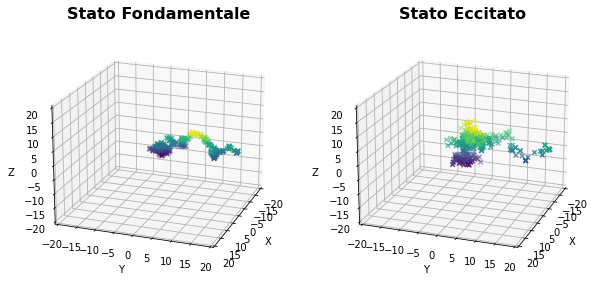

In [181]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,8))

def plot(X,Y,Z,plot,stato,coda):
    X, Y, Z = np.loadtxt('risultati/posizione'+stato+'Uniforme.txt',usecols=(0,1,2),unpack=True)
    if not(coda):
        X=X[:400]
        Y=Y[:400]
        Z=Z[:400]
    else:
        X=X[400:]
        Y=Y[400:]
        Z=Z[400:]
    ax = fig.add_subplot(1,2,plot, projection='3d')
    ax.scatter(X, Y, Z, c=Z, marker='x')
    ax.view_init(elev=20, azim=20)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Stato '+stato,fontweight='bold',fontsize=16)
    bound=20
    ax.set_xlim(-bound,bound)
    ax.set_ylim(-bound,bound)
    ax.set_zlim(-bound,bound)

plot(X,Y,Z,1,'Fondamentale',False)
    
plot(X,Y,Z,2,'Eccitato',False)

plt.show()

Mostriamo ora il grafico della distanza media dell'esploratore dall'origine, in funzione del numero di passi.

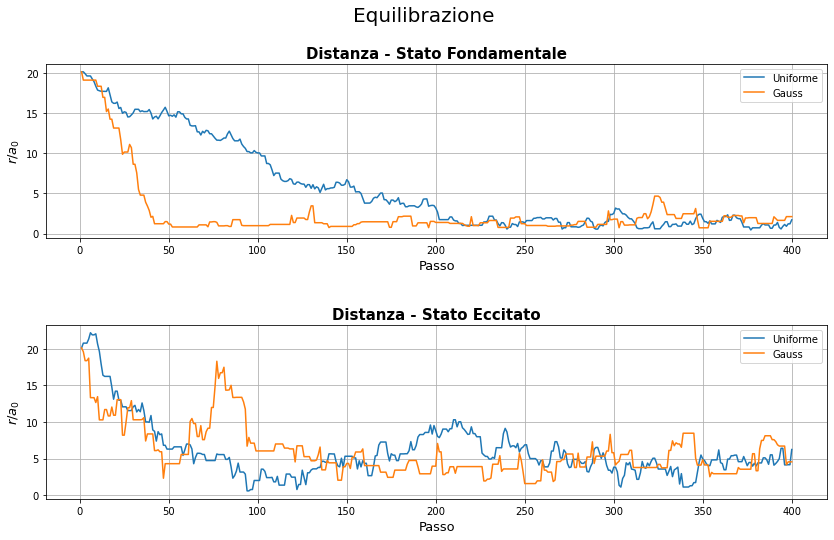

In [182]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 400
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize =(14,8))
plt.suptitle("Equilibrazione", fontsize=20)
plt.subplot(2,1,1)

dist = np.loadtxt("risultati/posizioneFondamentaleUniforme.txt",max_rows=400, unpack='true')
norms = np.linalg.norm(dist, axis=0)
plt.plot(x, norms, label = "Uniforme")
dist = np.loadtxt("risultati/posizioneFondamentaleGaussiano.txt",max_rows=400,  unpack='true')
norms = np.linalg.norm(dist, axis=0)
plt.plot(x, norms, label = "Gauss")
plt.ylabel('$r/a_0$', fontsize=13)
plt.xlabel('Passo', fontsize=13)
plt.grid(True)
plt.title('Distanza - Stato Fondamentale', fontsize=15, fontweight = "bold")
plt.legend()


plt.subplot(2,1,2)
dist = np.loadtxt("risultati/posizioneEccitatoUniforme.txt",max_rows=400, unpack='true')
norms = np.linalg.norm(dist, axis=0)
plt.plot(x, norms, label = "Uniforme")
dist = np.loadtxt("risultati/posizioneEccitatoGaussiano.txt", max_rows=400, unpack='true')
norms = np.linalg.norm(dist, axis=0)
plt.plot(x, norms, label = "Gauss")
plt.ylabel('$r/a_0$', fontsize=13)
plt.xlabel('Passo', fontsize=13)
plt.grid(True)
plt.title('Distanza - Stato Eccitato', fontsize=15, fontweight = "bold")
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

Come si può vedere, entro 400 passi la simulazione può ben dirsi equilibrata, dato che si attesta in buona approssimazione attorno a un valore medio rispettivamente di 2.5 per lo stato fondamentale, e di 5 per lo stato eccitato. La posizione dell'esploratore continua a oscillare attorno a questo valore medio, campionando tutta la funzione d'onda. In seguito all'equilibrazione, possiamo fargli ora campionare l'intera funzione, con diecimila passi Monte Carlo:

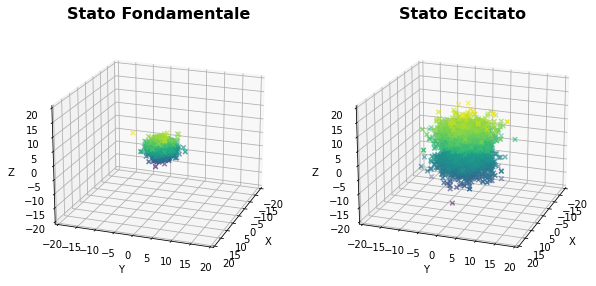

In [183]:
fig = plt.figure(figsize=(10,8))
plot(X,Y,Z,1,'Fondamentale',True)
plot(X,Y,Z,2,'Eccitato',True)
plt.show()


- How large should be the number of Monte Carlo Metropolis steps in each block?

Fatta l'equilibrazione, possiamo salvare la distanza radiale corrispondente a ogni passo dell'algoritmo Metropolis. Una volta raccolto questo campione di distanze, calcoliamo la media a blocchi. Per questa parte di esercizio è stato considerato un numero di campioni $N_{samples}=10^6$ e un numero di blocchi $N_{blk}=200$.

### misura del raggio

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

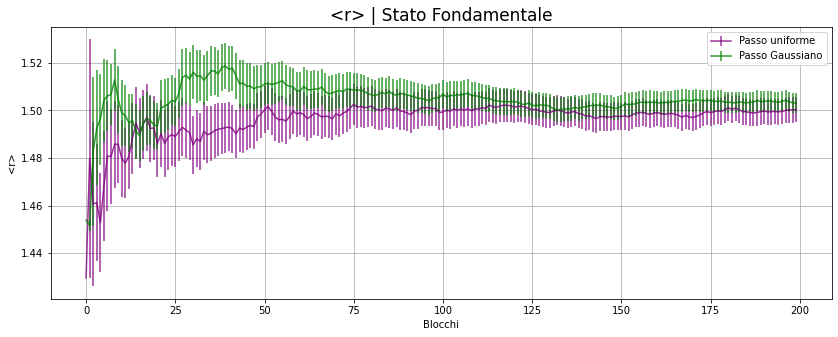

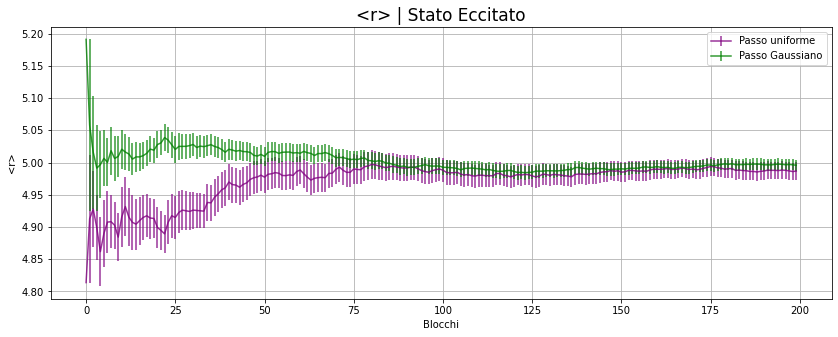

In [184]:
import matplotlib.pyplot as plt
import numpy as np

r100, err100 = np.loadtxt('risultati/rMedioFondamentaleUniforme.txt',unpack=True,usecols=(0,1))
r100G, err100G = np.loadtxt('risultati/rMedioFondamentaleGaussiano.txt',unpack=True,usecols=(0,1))
r210, err210 = np.loadtxt('risultati/rMedioEccitatoUniforme.txt',unpack=True,usecols=(0,1))
r210G, err210G = np.loadtxt('risultati/rMedioEccitatoGaussiano.txt',unpack=True,usecols=(0,1))

x = np.arange(r100.size)

plt.figure(figsize=(14,5))
plt.errorbar(x,r100,yerr=err100,alpha=0.8, label="Passo uniforme", color="purple")
plt.errorbar(x,r100G,yerr=err100G,alpha=0.8, label="Passo Gaussiano",color='green')
plt.title("<r> | Stato Fondamentale", fontsize=17)
plt.xlabel('Blocchi')
plt.ylabel('<r>')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
plt.errorbar(x,r210,yerr=err210,alpha=0.8, label="Passo uniforme", color="purple")
plt.errorbar(x,r210G,yerr=err210G,alpha=0.8, label="Passo Gaussiano",color='green')
plt.title("<r> | Stato Eccitato", fontsize=17)
plt.xlabel('Blocchi')
plt.ylabel('<r>')
plt.legend()
plt.grid(True)
plt.show()

Non noto una differenza sostanziale tra il campionamento con passo uniformre o gaussiano, i risultati sono compatibili con il valor medio teorico nel limite di $1-1.5\sigma$.